# Amazon Order History

### Import all mondules that will be used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\RhaMo\AppData\Local\Temp\ipykernel_7644\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading in the csv file

In [2]:
# Making the csv file readable
df = pd.read_csv('Retail.OrderHistory.1.csv')

## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          1010 non-null   object 
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

### Taking out any null values
This method will take any mission values and replace them with whatever I desire. In this instance, I am replacing all of them with 0s.

In [4]:
#Filling missing calues with 0
df = df.fillna(0)

## Saving addresses
Here, I was originally going to save name with addresses, but I found a better way of implementing that

In [5]:
# getting all the addresses used by using the unique method so there are no repeats
addresses = df["Shipping Address"].unique()
addresses

array(['Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States',
       'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teri Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Niyah Ransom 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Amazon Locker - Ingmar 201 W Market St at 7-Eleven Newport DE 19804-3151 United States',
       'Stephanie Pullins 1700 W TIOGA ST APT 606 PHILADELPHIA PA 19140-4936 United States',
       'Niyah Ransom 1700 W TIOGA ST  606 PHILADELPHIA PA 19140-4936 United States',
       'Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5017 United States',
       'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States',
       'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States'

In [6]:
steph1 = addresses[1]
steph2 = addresses[6] 
steph1

'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States'

In [7]:
steph2

'Niyah Ransom 1700 W TIOGA ST  606 PHILADELPHIA PA 19140-4936 United States'

### Incorrect Total
I am looking to see who spent the most money and since there are no names as a column in the csv file, I am correlating the people on the account from their addresses. However, I cannot use `Shipping Item Subtotal` since that column has the incorrect amount spent

In [8]:
s = df.groupby(['Shipping Address'])['Shipment Item Subtotal'].sum().reset_index()
s

,Shipping Address,Shipment Item Subtotal
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,5.6959.95
1,Amazon Locker - Ingmar 201 W Market St at 7-El...,Not Available
2,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
3,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,24.9521.999.95484845.1545.1544.9344.9311.944.9...
4,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,9.999.499.4915.5521.9821.9834.2634.2619.9912.9...
5,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,39.9939.913.9929.9813.2813.5259.4910.8856.4Not...
6,Imir Ransom 2 Indepence Hall Newark Delaware 1...,7.512.96.4
7,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,9522.978.8210.9918.9842.9914.99
8,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,299.9910.996.4510.9221.9945.79
9,Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5...,44.91


## Total amount spent by each party
grouping the `Total Owed` column with the `Shipping Address` column to make it concise on who spent what overall. however, there are some repeating names in some of these addresses, so I will have to make it even more concise.

In [9]:
s = df.groupby(['Shipping Address'])['Total Owed'].sum().reset_index()
s

,Shipping Address,Total Owed
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.98
1,Amazon Locker - Ingmar 201 W Market St at 7-El...,0.00
2,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
3,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,646.81
4,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1142.67
5,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,3333.44
6,Imir Ransom 2 Indepence Hall Newark Delaware 1...,50.57
7,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,221.71
8,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,381.13
9,Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5...,47.61


### Function for getting Names
Need to make a column with the addresses reflecting the names of those associated with them. That way, I can not only combine those with multiple addresses, but also get a clearer way on seeing who is who.

I used regex to help get the addresses to the corresponding names

In [10]:
import re
def get_name(name):
    if re.search(r'Stephanie Pullins', name):
        return "Stephanie"
    elif re.search(r'Teri Pullins', name):
        return 'Stephanie'
    elif re.search(r'Amazon Locker', name):
        return 'Stephanie'
    elif re.search(r'Jaliah Ransom', name):
        return 'Imir'
    elif re.search(r'Niyah Ransom', name):
        return 'Niyah'
    elif re.search(r'Ahmad Benefield', name):
        return "Ahmad"
    elif re.search(r'Teyonna Pullins', name):
        return "Teyonna"
    elif re.search(r'Sadie Graham', name):
        return "Imir"
    elif re.search(r'Jeffrey Mullen', name):
        return "Imir"
    elif re.search('Imir', name):
        return "Imir"

### Applying the function
I am using the apply and passing in my new function as an arguement so that it will be used on the `Shipping Address` column to search through the addresses and assign the corresponding names and save all of those under a new column called `Name`.

In [11]:
# Applying this function to the age column using the apply() method and assigning the result to a new coumn called name
df['Name'] = df['Shipping Address'].apply(get_name)
# New info for the new column added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          1010 non-null   object 
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

In [12]:
# Getting the unique names from the DataFrame
df['Name'].unique()

array(['Imir', 'Stephanie', 'Niyah', 'Ahmad', 'Teyonna'], dtype=object)

### Who spent the most money?
After getting the `Name` of those that made purchases on the account using the `Shipping Address` column,
I find the sum of the `Total Owed` (the total amount of purchases they made) and group them together
to see who made the most purchases since the beginning of the account

In [13]:
#df.sort_values('Name')

In [14]:
overall_sum = df.groupby(['Name'])['Total Owed'].sum().reset_index()
overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,6183.03
2,Niyah,711.76
3,Stephanie,11227.91
4,Teyonna,23.05


### Plotted
The y axis is the total amount spent. I used my variable `overall_sum` to represent the total amont spent so that it was the same
size as my x axis. I also made the x axis the same size using the method `unique` since the sum of from the `Total Owed` only gives the
unique column names since they were grouped together in using the measurement `sum`. <break>
    
Though, the next issue I had was `df['Name'].unique()` was putting the names in the incorrect order, for the `overall_sum` DataFrame has
the names in alphabetical order. So, I casted the `sorted` function over it so that `Name` column would return in alphabetical order,
matching it up with it's respective data.

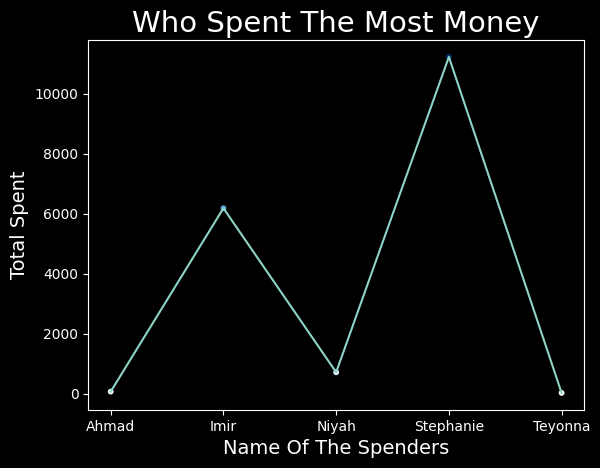

In [15]:
x = sorted(df['Name'].unique())
y = overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('who spent the most money'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title(), fontsize=14)


plt.plot(x, y)
plt.show()

## More Analysis
I am going to do more analysis to see how much was spent for each party during different years and even different months

### Getting the months
Just like how I got `Name` from the `Shipping Address` column, I am going to get the months of the `Order Date` column using regex inside of a newly made function

In [16]:
def get_month_2023(date):
    if re.search(r'^(\d{4})-01-', date):
        return 'January'
    elif re.search(r'^(\d{4})-02-', date):
        return 'February'
    elif re.search(r'^(\d{4})-03-', date):
        return 'March'
    elif re.search(r'^(\d{4})-04-', date):
        return 'April'
    elif re.search(r'^(\d{4})-05-', date):
        return 'May'
    elif re.search(r'^(\d{4})-06-', date):
        return 'June'
    elif re.search(r'^(\d{4})-07-', date):
        return 'July'
    elif re.search(r'^(\d{4})-08-', date):
        return 'August'
    elif re.search(r'^(\d{4})-09-', date):
        return 'September'
    elif re.search(r'^(\d{4})-10-', date):
        return 'October'
    elif re.search(r'^(\d{4})-11-', date):
        return 'November'
    elif re.search(r'^(\d{4})-12-', date):
        return 'December'

    

### Making Month column
As before, applying the function to the `Order Date` column to search through and set the months up depending on the condition met and using that to make a new column called `Month`.

In [17]:
df['Month'] = df['Order Date'].apply(get_month_2023)

### The amount of orders for each month

In [18]:
dates_and_months = df.groupby(['Month'])['Order Date'].size().reset_index()
dates_and_months

,Month,Order Date
0,April,74
1,August,100
2,December,48
3,February,126
4,January,104
5,July,69
6,June,92
7,March,34
8,May,77
9,November,85


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          1010 non-null   object 
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

### The amount of orders for each month by each person

In [20]:
# Using the measurement size to get the amount of orders for the month of each person
dates_and_months = df.groupby(['Month', 'Name'])['Order Date'].size().reset_index()
dates_and_months

,Month,Name,Order Date
0,April,Imir,15
1,April,Stephanie,59
2,August,Imir,15
3,August,Stephanie,85
4,December,Imir,13
5,December,Stephanie,35
6,February,Ahmad,1
7,February,Imir,8
8,February,Stephanie,117
9,January,Imir,9


### Pivot on the grouped DataFrame
using the pivot method to get a better view the amount of items spent by each person that made purchases on the account

In [21]:
pivoted_df = dates_and_months.pivot(
    columns='Name',
    index='Month',
    values='Order Date'
)
pivoted_df = pivoted_df.fillna(0)
pivoted_df

Name,Ahmad,Imir,Niyah,Stephanie,Teyonna
Month,,,,,
April,0.0,15.0,0.0,59.0,0.0
August,0.0,15.0,0.0,85.0,0.0
December,0.0,13.0,0.0,35.0,0.0
February,1.0,8.0,0.0,117.0,0.0
January,0.0,9.0,0.0,95.0,0.0
July,0.0,15.0,0.0,54.0,0.0
June,1.0,24.0,0.0,67.0,0.0
March,0.0,5.0,0.0,29.0,0.0
May,0.0,19.0,0.0,54.0,4.0


## Most spent in 2023
Looking to see which person on the account spent the most money

In [22]:
items_for_2023 = df[df["Order Date"] >= "2023-01-01"]
items_for_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 778
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         779 non-null    object 
 1   Order ID                        779 non-null    object 
 2   Order Date                      779 non-null    object 
 3   Purchase Order Number           779 non-null    object 
 4   Currency                        779 non-null    object 
 5   Unit Price                      779 non-null    float64
 6   Unit Price Tax                  779 non-null    float64
 7   Shipping Charge                 779 non-null    float64
 8   Total Discounts                 779 non-null    object 
 9   Total Owed                      779 non-null    float64
 10  Shipment Item Subtotal          779 non-null    object 
 11  Shipment Item Subtotal Tax      779 non-null    object 
 12  ASIN                            779 non-n

In [23]:
current_overall_sum = items_for_2023.groupby(['Name'])['Total Owed'].sum().reset_index()
current_overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,2725.08
2,Niyah,711.76
3,Stephanie,9331.38
4,Teyonna,23.05


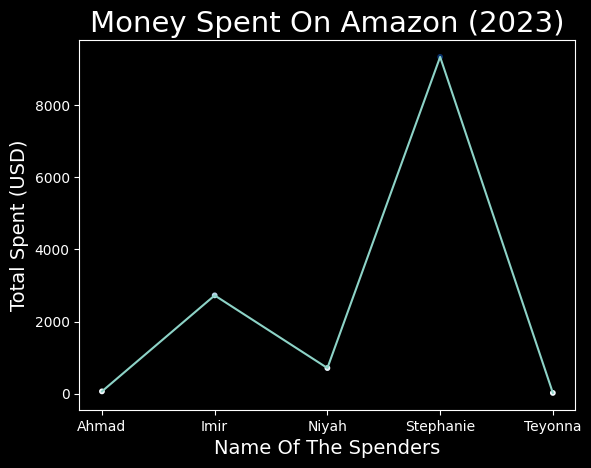

In [24]:
x = sorted(items_for_2023['Name'].unique())
y = current_overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('money spent on amazon (2023)'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title() + ' (USD)', fontsize=14)
plt.plot(x, y)
plt.show()

## Only Imir and Stephanie
Imir and Stephaine are the most active on the account. Imir has been on the account since 2015. Stephaine joined the account around 2020. I will comapare the two and see the differences in the amount spent and number of items purchased

In [25]:
name_index = df.set_index('Name')

### Dropping Names
I am dropping the names of everyone but Imir and Stephanie

In [26]:
df1 = name_index.drop(['Niyah', 'Teyonna', 'Ahmad']).reset_index()

In [27]:
df1 = pd.DataFrame(df1)

In [28]:
df1

,Name,Website,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,...,Ship Date,Shipping Option,Shipping Address,Billing Address,Carrier Name & Tracking Number,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details,Month
0,Imir,Amazon.com,112-9635934-6416260,2023-12-07T02:16:59Z,Not Applicable,USD,39.99,0.00,0.00,0,...,2023-12-08T10:04:30Z,next-1dc,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,AMZN_US(TBA310322605316),Macally Multi Device Backlit Mac Bluetooth Key...,Not Available,Not Available,Not Available,December
1,Stephanie,Amazon.com,112-4148362-2721041,2023-12-06T07:31:30Z,Not Applicable,USD,25.99,1.56,0.00,0,...,2023-12-06T17:28:11Z,next-1dc,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,USPS(9361289681026025179193),HIPPIE CRAFTER Watercolor Colored Pencils for ...,Not Available,Not Available,Not Available,December
2,Stephanie,Amazon.com,112-6935582-0369853,2023-12-04T00:13:04Z,Not Applicable,USD,9.29,0.56,0.00,0,...,2023-12-08T07:32:43Z,std-n-us,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Not Available,Colorya 72 Soft Core Premium Colored Pencils W...,Not Available,Not Available,Not Available,December
3,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,5.24,0.31,0.00,0,...,2023-12-04T23:17:30Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,UPS(1ZAC27650205605441),MARKART Professional Drawing Sketching Pencil ...,Not Available,Not Available,Not Available,December
4,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,7.99,0.48,0.00,0,...,2023-12-05T16:20:06Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,AMZN_US(TBA310242061487),"iBayam 9"" x 12"" Premium Sketch Book Set, 1-Pac...",Not Available,Not Available,Not Available,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Imir,Amazon.com,113-1020157-3732228,2019-03-13T03:49:46Z,Not Applicable,USD,21.99,0.00,0.00,0,...,2019-03-13T15:28:17Z,second,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,AMZN_US(TBA914851299000),Mpow Flame Bluetooth Headphones Waterproof IPX...,Not Available,Not Available,Not Available,March
961,Imir,Amazon.com,111-3837808-3532240,2018-12-07T17:58:13Z,Not Applicable,USD,45.79,0.00,0.00,0,...,2018-12-08T01:15:56Z,Std US D2D Dom,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,China Post(LT090332896CN),"Tulas Action Figure Drawing Models, 2 Pcs Huma...",Not Available,Not Available,Not Available,December
962,Imir,Amazon.com,106-7683127-1053051,2016-07-23T12:00:46Z,Not Applicable,USD,7.50,0.00,12.53,0,...,2016-07-25T22:43:41Z,Exp Cont US Street Addr,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,USPS(9400110200883141471846),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July
963,Imir,Amazon.com,106-0231178-3420224,2016-07-23T12:00:46Z,Not Applicable,USD,12.90,0.00,11.24,0,...,2016-07-24T08:19:33Z,second,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,AMZN_US(TBA042166591000),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            965 non-null    object 
 1   Website                         965 non-null    object 
 2   Order ID                        965 non-null    object 
 3   Order Date                      965 non-null    object 
 4   Purchase Order Number           965 non-null    object 
 5   Currency                        965 non-null    object 
 6   Unit Price                      965 non-null    float64
 7   Unit Price Tax                  965 non-null    float64
 8   Shipping Charge                 965 non-null    float64
 9   Total Discounts                 965 non-null    object 
 10  Total Owed                      965 non-null    float64
 11  Shipment Item Subtotal          965 non-null    object 
 12  Shipment Item Subtotal Tax      965 

### DataFrame into CSV
I am saving the newly modified/updated DataFrame into a csv so that I can practice some visualizations using Tableau

In [30]:
# df.to_csv('/Users/imir/python/amazon_orders.csv')

In [31]:
# df1.to_csv('E:/RhaMo/CSV Files/orders_amazon.csv')

In [32]:
new_df = pd.read_csv('E:/RhaMo/CSV Files/orders_amazon.csv')

In [33]:
new_df['Name'].unique()

array(['Imir', 'Stephanie'], dtype=object)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      965 non-null    int64  
 1   Name                            965 non-null    object 
 2   Website                         965 non-null    object 
 3   Order ID                        965 non-null    object 
 4   Order Date                      965 non-null    object 
 5   Purchase Order Number           965 non-null    object 
 6   Currency                        965 non-null    object 
 7   Unit Price                      965 non-null    float64
 8   Unit Price Tax                  965 non-null    float64
 9   Shipping Charge                 965 non-null    float64
 10  Total Discounts                 965 non-null    object 
 11  Total Owed                      965 non-null    float64
 12  Shipment Item Subtotal          965 

### Deleting Column
Taking out unneeded column. It is acting as an index counter for the rows of the columns, but it is not needed since there already is a default counter

In [35]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)
new_df

,Name,Website,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,...,Ship Date,Shipping Option,Shipping Address,Billing Address,Carrier Name & Tracking Number,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details,Month
0,Imir,Amazon.com,112-9635934-6416260,2023-12-07T02:16:59Z,Not Applicable,USD,39.99,0.00,0.00,0,...,2023-12-08T10:04:30Z,next-1dc,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,AMZN_US(TBA310322605316),Macally Multi Device Backlit Mac Bluetooth Key...,Not Available,Not Available,Not Available,December
1,Stephanie,Amazon.com,112-4148362-2721041,2023-12-06T07:31:30Z,Not Applicable,USD,25.99,1.56,0.00,0,...,2023-12-06T17:28:11Z,next-1dc,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,USPS(9361289681026025179193),HIPPIE CRAFTER Watercolor Colored Pencils for ...,Not Available,Not Available,Not Available,December
2,Stephanie,Amazon.com,112-6935582-0369853,2023-12-04T00:13:04Z,Not Applicable,USD,9.29,0.56,0.00,0,...,2023-12-08T07:32:43Z,std-n-us,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Not Available,Colorya 72 Soft Core Premium Colored Pencils W...,Not Available,Not Available,Not Available,December
3,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,5.24,0.31,0.00,0,...,2023-12-04T23:17:30Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,UPS(1ZAC27650205605441),MARKART Professional Drawing Sketching Pencil ...,Not Available,Not Available,Not Available,December
4,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,7.99,0.48,0.00,0,...,2023-12-05T16:20:06Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,AMZN_US(TBA310242061487),"iBayam 9"" x 12"" Premium Sketch Book Set, 1-Pac...",Not Available,Not Available,Not Available,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Imir,Amazon.com,113-1020157-3732228,2019-03-13T03:49:46Z,Not Applicable,USD,21.99,0.00,0.00,0,...,2019-03-13T15:28:17Z,second,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,AMZN_US(TBA914851299000),Mpow Flame Bluetooth Headphones Waterproof IPX...,Not Available,Not Available,Not Available,March
961,Imir,Amazon.com,111-3837808-3532240,2018-12-07T17:58:13Z,Not Applicable,USD,45.79,0.00,0.00,0,...,2018-12-08T01:15:56Z,Std US D2D Dom,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,China Post(LT090332896CN),"Tulas Action Figure Drawing Models, 2 Pcs Huma...",Not Available,Not Available,Not Available,December
962,Imir,Amazon.com,106-7683127-1053051,2016-07-23T12:00:46Z,Not Applicable,USD,7.50,0.00,12.53,0,...,2016-07-25T22:43:41Z,Exp Cont US Street Addr,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,USPS(9400110200883141471846),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July
963,Imir,Amazon.com,106-0231178-3420224,2016-07-23T12:00:46Z,Not Applicable,USD,12.90,0.00,11.24,0,...,2016-07-24T08:19:33Z,second,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,AMZN_US(TBA042166591000),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July


## Plotting The Spendings
I will be plotting the overall spendings bewtween these two, Imir and Stepahnie, that are on the account
### First Plot
I started to plot the spendings by putting `Names` at the x-axis and `Total Owed` ay the y-axis.
But it is not getting the correct amount for each person

Text(0.5, 1.0, 'Total Amount of USD Spent From Each Person')

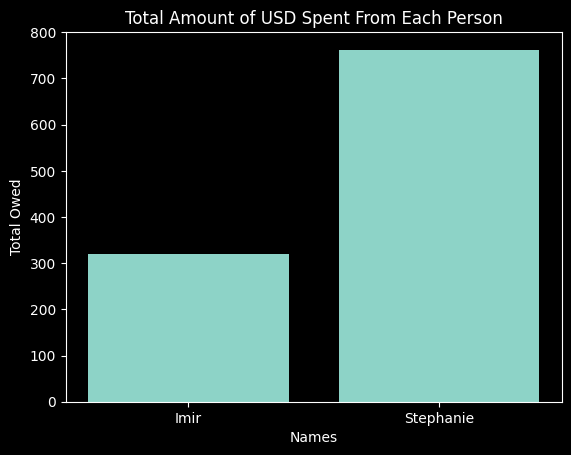

In [36]:
plt.bar(new_df['Name'], new_df['Total Owed'])
plt.xlabel('Names')
plt.ylabel('Total Owed')
plt.title('Total Amount of USD Spent From Each Person')

## Group By Plot
I am making a GroupDataFrame to properly plot the `Names` and `Total Owed`

In [40]:
grouped = new_df.groupby('Name')['Total Owed'].sum().reset_index()

In [41]:
grouped

,Name,Total Owed
0,Imir,6183.03
1,Stephanie,11227.91


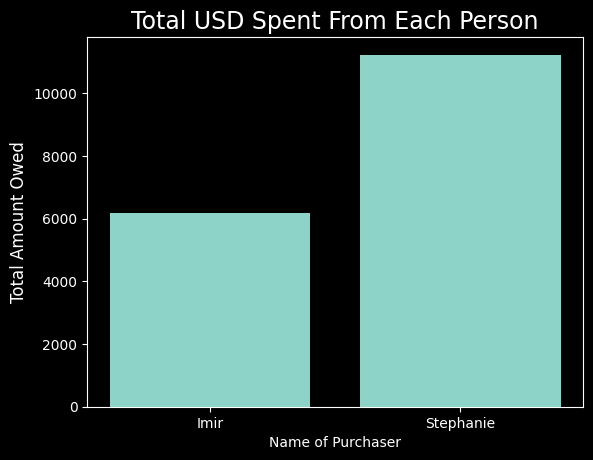

In [68]:
plt.bar(grouped['Name'], grouped['Total Owed'])
plt.xlabel('Name of Purchaser',)
plt.ylabel('Total Amount Owed', fontsize=12)
plt.title('Total USD Spent From Each Person', fontsize=17)
plt.show()

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            965 non-null    object 
 1   Website                         965 non-null    object 
 2   Order ID                        965 non-null    object 
 3   Order Date                      965 non-null    object 
 4   Purchase Order Number           965 non-null    object 
 5   Currency                        965 non-null    object 
 6   Unit Price                      965 non-null    float64
 7   Unit Price Tax                  965 non-null    float64
 8   Shipping Charge                 965 non-null    float64
 9   Total Discounts                 965 non-null    object 
 10  Total Owed                      965 non-null    float64
 11  Shipment Item Subtotal          965 non-null    object 
 12  Shipment Item Subtotal Tax      965 

In [48]:
new_df['Quantity'].unique()

array([1, 0, 6, 2, 4, 5, 3], dtype=int64)

In [54]:
new_df['Payment Instrument Type'].unique()

array(['Visa - 3965', 'Visa - 1982', 'Visa - 0835', 'Visa - 5961',
       'Not Available', 'Visa - 8338', 'Visa - 4344',
       'Gift Certificate/Card and Visa - 4344', 'Bank Account - 572',
       'Visa - 8730', 'Visa - 1927', 'Visa - 9772', 'Visa - 9718',
       'Visa - 4587', 'Visa - 4846', 'Visa - 5082', 'MasterCard - 3977'],
      dtype=object)

In [59]:
pay_group = new_df.groupby(['Name', 'Payment Instrument Type'])['Order ID'].size()

In [60]:
pay_group

Name       Payment Instrument Type              
Imir       Bank Account - 572                         1
           MasterCard - 3977                          3
           Visa - 0835                               17
           Visa - 1927                               29
           Visa - 3965                               78
           Visa - 4344                                1
           Visa - 4587                                9
           Visa - 4846                               19
           Visa - 5082                               18
           Visa - 8730                                3
           Visa - 9718                               29
           Visa - 9772                                1
Stephanie  Gift Certificate/Card and Visa - 4344      4
           Not Available                             14
           Visa - 1927                                6
           Visa - 1982                               93
           Visa - 3965                               83